In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import time
from matplotlib.animation import FuncAnimation
import time

class SpectrumEnvironment:
    def __init__(self, num_bands=10, steps=25):
        self.num_bands = num_bands  # Total number of frequency bands
        self.steps = steps
        self.channel_states = [[] for _ in range(num_bands)]
        self.transition_matrices = self._initialize_transition_matrices()
        self.state = self._generate_spectrum_state()  # Current state of the spectrum
        self.total_reward = 0  # Track total reward
        self.rewards = []  # Track rewards for each step
        self.energy_costs = [[] for _ in range(num_bands)]

    def _initialize_transition_matrices(self):
        """
        Generate a unique random Markov chain transition matrix for each band.
        Each matrix ensures that the probabilities in each row sum to 1.
        """
        matrices = []
        for _ in range(self.num_bands):
            # Generate a random 2x2 matrix
            random_matrix = np.random.rand(2, 2)
            # Normalize each row to sum to 1
            transition_matrix = random_matrix / random_matrix.sum(axis=1, keepdims=True)
            matrices.append(transition_matrix)
        return matrices

    def _generate_spectrum_state(self):
        """
        Generate a spectrum state using Markov chain dynamics for each band.
        Each band has a distinct transition matrix and evolves over 'steps' timesteps.
        """
        new_states = []

        for band in range(self.num_bands):
            # Get the last state or default to 0 if no history exists
            last_state = self.channel_states[band][-1] if self.channel_states[band] else 0

            # Generate states for the next 'steps' timesteps using the Markov chain
            band_states = []
            for _ in range(self.steps):
                # Determine the next state based on the Markov chain
                transition_probabilities = self.transition_matrices[band][last_state]
                next_state = np.random.choice([0, 1], p=transition_probabilities)
                band_states.append(next_state)
                last_state = next_state  # Update for the next step

            # Append the generated states to history
            self.channel_states[band] = band_states
        return self.channel_states
    
    def energy_detection(self, time_step, band, delta=0.1):
        """
        Perform energy detection for a specific band and timestep.
        Calculates energy dynamically and assigns rewards based on the state and energy detection.

        Parameters:
        - time_step (int): The timestep to evaluate.
        - band (int): The band (channel) number to evaluate.
        - delta (float): The change in energy state for transitions (default: 0.1).

        Returns:
        - reward (int): The reward calculated based on energy detection and the channel state.
        """
        # Ensure the inputs are within valid ranges
        if not (0 <= band < self.num_bands):
            raise ValueError("Band number out of range.")
        if not (0 <= time_step < self.steps):
            raise ValueError("Time step out of range.")

        # Current state of the channel
        current_state = self.channel_states[band][time_step]

        # Retrieve previous energy state (default to 0 if no previous energy state)
        previous_energy = self.energy_costs[band][-1] if len(self.energy_costs[band]) > 0  else 0

        # Calculate new energy state
        if current_state == 1:
            # Increase energy by delta if the state is 1
            new_energy = previous_energy + delta
        else:
            # No change in energy if the state is 0
            new_energy = previous_energy

        # # Adaptive threshold
        # sensing_history_length = len(self.energy_costs[band]) if len(self.energy_costs) > band else 0
        # threshold = previous_energy + delta * (sensing_history_length + 1)

        # Calculate reward
        # if current_state == 0:
        #     reward = 30  # Reward for idle state
        # else:
        #     reward = 5 if new_energy > threshold else -15  # Reward based on energy comparison

        # Update energy cost history for the band
        # if len(self.energy_costs) <= band:
        #     self.energy_costs.append([])  # Initialize energy cost list for the band
        self.energy_costs[band].append(new_energy)

        # Update total reward and rewards list
        # self.total_reward += reward
        # self.rewards.append(reward)

        return new_energy

        



    def step(self, time_step, band):
        """
        Calculate the reward based on the state of a given channel at a specific timestep.
        
        Parameters:
        - time_step (int): The time step to evaluate.
        - band (int): The band (channel) number to evaluate.
        
        Returns:
        - reward (int): The reward gained from the channel's state at the specified time step.
        """
        # Ensure the inputs are within valid ranges
        if not (0 <= band < self.num_bands):
            raise ValueError("Band number out of range.")
        if not (0 <= time_step < self.steps):
            raise ValueError("Time step out of range.")

        # Get the state of the specified channel at the given timestep
        state = self.channel_states[band][time_step]

        # Calculate the reward
        reward = 30 if state == 0 else -15

        # Update the total reward and track the step reward
        self.total_reward += reward
        self.rewards.append(reward)

        return reward

In [42]:
env = SpectrumEnvironment()
for i in env.state:
    print(i)

[np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1)]
[np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0)]
[np.int64(1), np.int64

In [43]:
# Initialize environment
env = SpectrumEnvironment(num_bands=10, steps=50)

# Generate states for all bands
env._generate_spectrum_state()

# Store rewards, actions, and energy costs for visualization
rewards_over_time = []
actions_over_time = []
energy_costs = [[0 for _ in range(env.steps)] for _ in range(env.num_bands)]  # Initialize with None

# Simulate over timesteps
for t in range(env.steps):
    # selected_band = np.random.randint(0, env.num_bands)
    # actions_over_time.append(selected_band)

    # Perform energy detection
    for selected_band in range(env.num_bands):
        energy = env.energy_detection(t, selected_band)
    #rewards_over_time.append(reward)
    # if t == 0:
    #     energy_costs[selected_band][t] = energy
    # else:
    #     energy_costs[selected_band][t] = energy + energy_costs[selected_band][t-1] # Update energy cost for the selected band and timestep


# Visualization of channel states over time
#fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)  # 4 separate plots for visualization

time_steps = np.arange(env.steps)

# Plot the first 4 bands separately
# for i in range(4):
#     axes[i].plot(time_steps, [env.channel_states[i][t] for t in range(env.steps)], label=f"Band {i} State")
#     axes[i].plot(time_steps, energy_costs[i], label=f"Band {i} Energy", linestyle="--")
#     axes[i].set_ylabel("State/Energy")
#     axes[i].legend()
#     axes[i].set_title(f"Band {i} States and Energy Over Time")



# axes[-1].set_xlabel("Time Steps")
# plt.tight_layout()
# plt.show()

for i in range(env.num_bands): 
    print(env.energy_costs[i])


[0.1, 0.1, 0.2, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.8999999999999999, 0.8999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0999999999999999, 1.0999999999999999, 1.2, 1.2, 1.3, 1.3, 1.3, 1.4000000000000001, 1.5000000000000002, 1.5000000000000002, 1.6000000000000003, 1.6000000000000003, 1.6000000000000003, 1.6000000000000003, 1.6000000000000003, 1.7000000000000004, 1.7000000000000004, 1.7000000000000004, 1.7000000000000004, 1.8000000000000005, 1.8000000000000005, 1.9000000000000006, 1.9000000000000006, 1.9000000000000006, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.2000000000000006, 2.2000000000000006, 2.2000000000000006, 2.3000000000000007]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0.1, 0.1, 0.2, 0.2, 0.30000000000000004, 0.4,

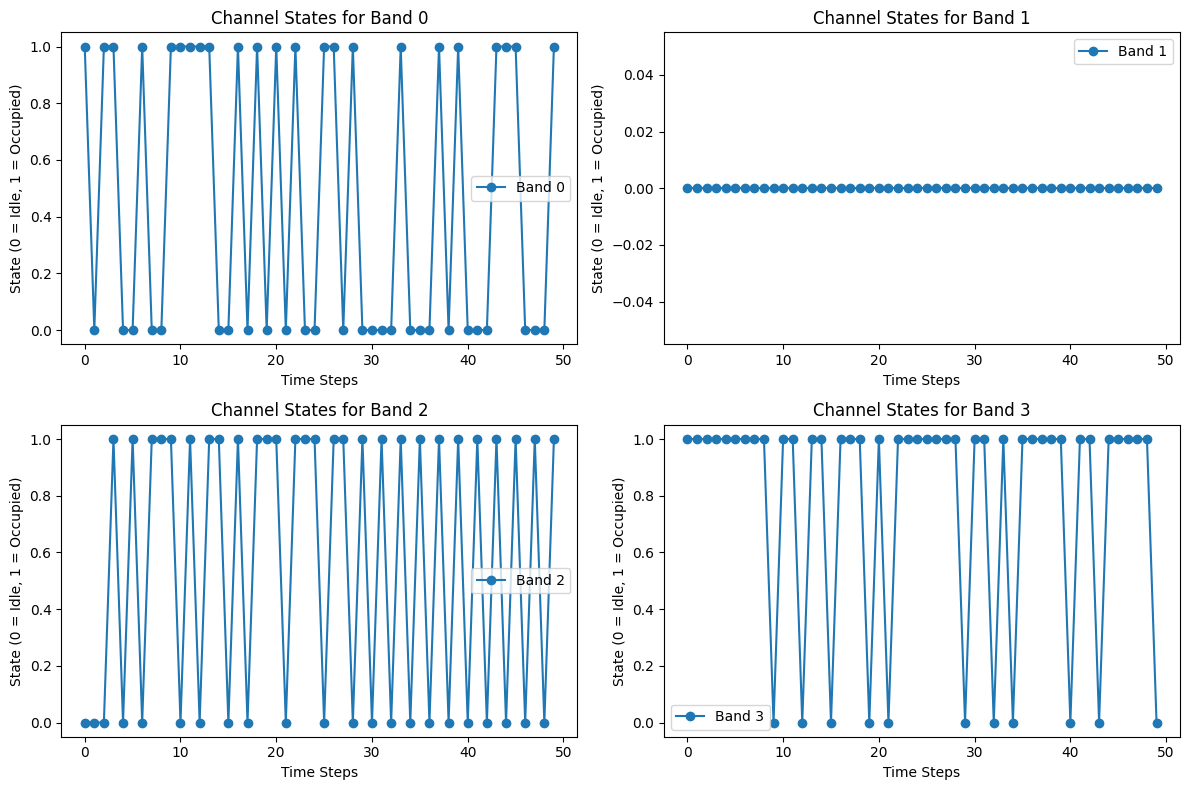

In [44]:
# Visualization of channel states for 4 selected bands
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots
selected_bands = [0, 1, 2, 3]  # Indices of bands to visualize

for i, band in enumerate(selected_bands):
    ax = axes[i // 2, i % 2]  # Access subplot in 2x2 grid
    states = [env.channel_states[band][t] for t in range(env.steps)]
    ax.plot(time_steps, states, label=f"Band {band}", marker='o')
    ax.set_xlabel("Time Steps")
    ax.set_ylabel("State (0 = Idle, 1 = Occupied)")
    ax.set_title(f"Channel States for Band {band}")
    ax.legend()

plt.tight_layout()
plt.show()
